# Additional classifiers 

This document trains and tests classification algorithms using the EmpatheticExchanges_v1 data

The classification algorithms used in this notebook are:

* XGBoost
* Random Forest
* KNN
* Gaussian Naive-Bayes

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
import xgboost as xgb
import CEM as cem
import os
from sklearn import preprocessing


In [18]:
def get_metrics(df, predictions,actual):
    modified_df = df.copy()
    modified_df = modified_df.rename(columns={actual: "empathy"})
    acc = accuracy_score(modified_df["empathy"],modified_df[predictions])
    cem_score = cem.get_cem(modified_df[predictions]-1,modified_df[["empathy"]])
    pre = precision_score(modified_df["empathy"],modified_df[predictions], average='weighted')
    f1 = f1_score(modified_df["empathy"],modified_df[predictions], average='weighted')
    rec = recall_score(modified_df["empathy"],modified_df[predictions], average='weighted')
    return [acc,cem_score,f1,pre,rec]

current_dir = os.getcwd() #get directory of the repository
groups_dir = current_dir+'\orocessed_databases\EmpatheticExchanges\previous_training_predictions'

columns2delete = ['conv_id','context','prompt','speaker_utterance','listener_utterance']

columns2delete = ['conv_id','context','prompt','speaker_utterance','listener_utterance','exchange_number', 'speaker_emotion','listener_emotion', 'predictions_EX','predictions_IP']

#3-level database
train_3 = pd.read_csv(groups_dir+"\EmpatheticExchanges_train_3.csv")
print(train_3.columns)
train_3 = train_3.drop(columns=columns2delete)
test_3 = pd.read_csv(groups_dir+"\EmpatheticExchanges_test_3.csv")
test_3 = test_3.drop(columns=columns2delete)
x_train_3 = train_3.drop(columns=['empathy'])
y_train_3 = train_3.empathy
x_test_3 = test_3.drop(columns=['empathy'])
y_test_3 = test_3.empathy
#5-level database
train_5 = pd.read_csv(groups_dir+"\EmpatheticExchanges_train_5.csv")
train_5 = train_5.drop(columns=columns2delete)
test_5 = pd.read_csv(groups_dir+"\EmpatheticExchanges_test_5.csv")
test_5 = test_5.drop(columns=columns2delete)
x_train_5 = train_5.drop(columns=['empathy'])
y_train_5 = train_5.empathy
x_test_5 = test_5.drop(columns=['empathy'])
y_test_5 = test_5.empathy
#Setting up classification algorithms
rfc = RandomForestClassifier(max_depth=10, random_state=42)
xgc = xgb.XGBClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()

<>:12: SyntaxWarning: invalid escape sequence '\E'
<>:19: SyntaxWarning: invalid escape sequence '\E'
<>:22: SyntaxWarning: invalid escape sequence '\E'
<>:29: SyntaxWarning: invalid escape sequence '\E'
<>:31: SyntaxWarning: invalid escape sequence '\E'
<>:12: SyntaxWarning: invalid escape sequence '\E'
<>:19: SyntaxWarning: invalid escape sequence '\E'
<>:22: SyntaxWarning: invalid escape sequence '\E'
<>:29: SyntaxWarning: invalid escape sequence '\E'
<>:31: SyntaxWarning: invalid escape sequence '\E'
C:\Users\edwin\AppData\Local\Temp\ipykernel_13404\2246317867.py:12: SyntaxWarning: invalid escape sequence '\E'
  groups_dir = current_dir+'\EmpatheticExchanges\previous_training_predictions'
C:\Users\edwin\AppData\Local\Temp\ipykernel_13404\2246317867.py:19: SyntaxWarning: invalid escape sequence '\E'
  train_3 = pd.read_csv(groups_dir+"\EmpatheticExchanges_train_3.csv")
C:\Users\edwin\AppData\Local\Temp\ipykernel_13404\2246317867.py:22: SyntaxWarning: invalid escape sequence '\E'
  t

Index(['conv_id', 'context', 'prompt', 'speaker_utterance',
       'listener_utterance', 'exchange_number', 's_negative', 's_neutral',
       's_positive', 'l_negative', 'l_neutral', 'l_positive', 'predictions_ER',
       'predictions_IP', 'predictions_EX', 'valence_speaker',
       'arousal_speaker', 'dominance_speaker', 'valence_listener',
       'arousal_listener', 'dominance_listener', 's_word_len', 'l_word_len',
       'agreeing', 'acknowledging', 'encouraging', 'consoling', 'sympathizing',
       'suggesting', 'questioning', 'wishing', 'neutral', 'speaker_emotion',
       'listener_emotion', 'mimicry', 'empathy'],
      dtype='object')


## 3-level classification

### Random Forest

In [28]:
#x_train_3['speaker_emotion'] = x_train_3['speaker_emotion'].astype('int')
#x_train_3['listener_emotion'] = x_train_3['listener_emotion'].astype('int')
le = preprocessing.LabelEncoder()
x_train_3['speaker_emotion'] = le.fit_transform(x_train_3['speaker_emotion'])
x_train_3['listener_emotion'] = le.fit_transform(x_train_3['listener_emotion'])
x_test_3['speaker_emotion'] = le.fit_transform(x_test_3['speaker_emotion'])
x_test_3['listener_emotion'] = le.fit_transform(x_test_3['listener_emotion'])


rfc.fit(x_train_3,y_train_3)
y_pred = rfc.predict(x_test_3)
modified_df = test_3.copy()
modified_df['predictions'] = y_pred
rfc_mets = get_metrics(modified_df,'predictions','empathy')
rfc_mets

c:\haru_human_understanding\Groups\empathy_classifier\CEM.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['empathy'] = y["empathy"].astype('int')


[0.5323232323232323,
 0.5698656923328725,
 0.40169768596515193,
 0.5149741166689076,
 0.5323232323232323]

### XGBoost

In [29]:
xgc.fit(x_train_3,y_train_3-1)
y_pred = xgc.predict(x_test_3)
modified_df = test_3.copy()
modified_df['predictions'] = y_pred + 1
get_metrics(modified_df,'predictions','empathy')

c:\haru_human_understanding\Groups\empathy_classifier\CEM.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['empathy'] = y["empathy"].astype('int')


[0.48787878787878786,
 0.57770608760713,
 0.43922319151499994,
 0.43634115143502494,
 0.48787878787878786]

### KNN

In [30]:
knn.fit(x_train_3,y_train_3-1)
y_pred = knn.predict(x_test_3)
modified_df = test_3.copy()
modified_df['predictions'] = y_pred + 1
get_metrics(modified_df,'predictions','empathy')

c:\haru_human_understanding\Groups\empathy_classifier\CEM.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['empathy'] = y["empathy"].astype('int')


[0.401010101010101,
 0.5436932671084326,
 0.39901138580790596,
 0.3977270966967936,
 0.401010101010101]

### Gaussian NB

In [31]:
gnb.fit(x_train_3,y_train_3)
y_pred = gnb.predict(x_test_3)
modified_df = test_3.copy()
modified_df['predictions'] = y_pred 
get_metrics(modified_df,'predictions','empathy')

c:\haru_human_understanding\Groups\empathy_classifier\CEM.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['empathy'] = y["empathy"].astype('int')


[0.40606060606060607,
 0.5512127566562434,
 0.3904077921892378,
 0.4148641091107267,
 0.40606060606060607]

## 5-level classification

In [57]:
2*(0.4128515481441895*0.40404040404040403)/(0.4128515481441895+0.40404040404040403)

0.4083984567966237

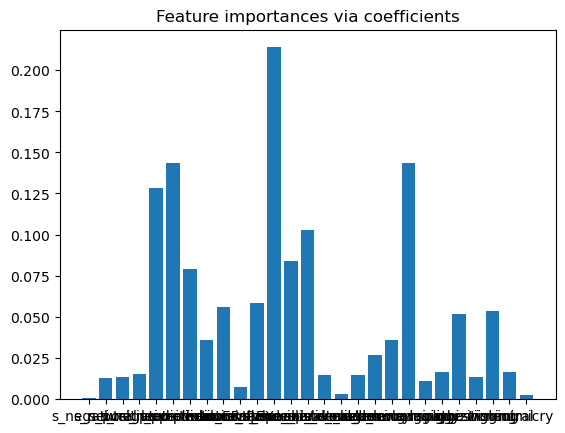

In [17]:
from sklearn.datasets import load_diabetes



import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.logspace(-9, 9, num=5)).fit(x_train_3, y_train_3)
importance = np.abs(ridge.coef_)
feature_names = np.array(x_train_3.columns)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()